<a href="https://colab.research.google.com/github/manekgnath/Machine-Learning/blob/main/ML_project_5_Decisiontree_%26_GaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/tennis.csv')
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
! pip install category_encoders

In [ ]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['outlook','temp','humidity','windy'])
encoder = encoder.fit_transform(df)
x = encoder

In [ ]:
df['play'] = df['play'].map({'yes': 1, 'no': 0})

In [ ]:
y = df['play']
x = x.drop('play',axis=1)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   outlook_1   14 non-null     int64
 1   outlook_2   14 non-null     int64
 2   outlook_3   14 non-null     int64
 3   temp_1      14 non-null     int64
 4   temp_2      14 non-null     int64
 5   temp_3      14 non-null     int64
 6   humidity_1  14 non-null     int64
 7   humidity_2  14 non-null     int64
 8   windy_1     14 non-null     int64
 9   windy_2     14 non-null     int64
dtypes: int64(10)
memory usage: 1.2 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=12)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)


GaussianNB()

In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

array([0, 0, 1])

In [ ]:
y_test[:5]

,play
7,0
9,1
12,1


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6666666666666666

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 1]])

Text(0.5, 1.0, 'Confusion Matrix')

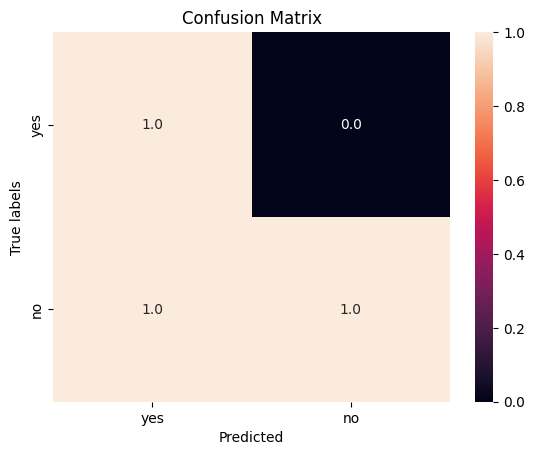

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt ='.1f')
labels = ['yes','no']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
data = pd.read_csv('/content/gender_classification_v7.csv')
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
data.shape

(5001, 8)

In [ ]:
y = data['gender']
x = data.drop('gender',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[:5]

array(['Female', 'Male', 'Female', 'Female', 'Female'], dtype='<U6')

In [ ]:
y_test[:5]

,gender
2764,Female
4767,Male
3814,Female
3499,Female
2735,Female


In [ ]:
from sklearn.metrics import accuracy_score,pair_confusion_matrix
accuracy_score(y_test,y_pred)

0.968031968031968

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[487,  17],
       [ 15, 482]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)
y_pred[:5]

array(['Female', 'Male', 'Female', 'Female', 'Female'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,pair_confusion_matrix
accuracy_score(y_test,y_pred)

0.967032967032967

Text(0.5, 1.0, 'Confussion matrix')

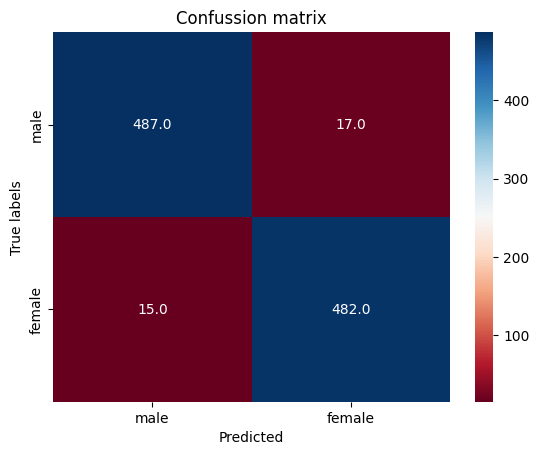

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt='.1f',cmap ='RdBu')
labels = ['male','female']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel('Predicted')
ax.set_ylabel('True labels')
ax.set_title('Confussion matrix')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/daily_weather.csv')
df

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1
...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,1
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,1
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,1
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,1


In [ ]:
df.shape

(1095, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   high_humidity_3pm       1095 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.7 KB


In [ ]:
df.isnull().sum()

,0
air_pressure_9am,3
air_temp_9am,5
avg_wind_direction_9am,4
avg_wind_speed_9am,3
max_wind_direction_9am,3
max_wind_speed_9am,4
rain_accumulation_9am,6
rain_duration_9am,3
relative_humidity_9am,0
high_humidity_3pm,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
air_pressure_9am,0
air_temp_9am,0
avg_wind_direction_9am,0
avg_wind_speed_9am,0
max_wind_direction_9am,0
max_wind_speed_9am,0
rain_accumulation_9am,0
rain_duration_9am,0
relative_humidity_9am,0
high_humidity_3pm,0


In [ ]:
y = df["high_humidity_3pm"]
x = df.drop('high_humidity_3pm',axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2 )

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[:5]

array([1, 0, 1, 0, 0])

In [ ]:
y_test[:5]

,high_humidity_3pm
166,1
244,1
428,1
639,0
758,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8732394366197183

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


In [ ]:
x = pd.DataFrame(x,columns=x.columns)

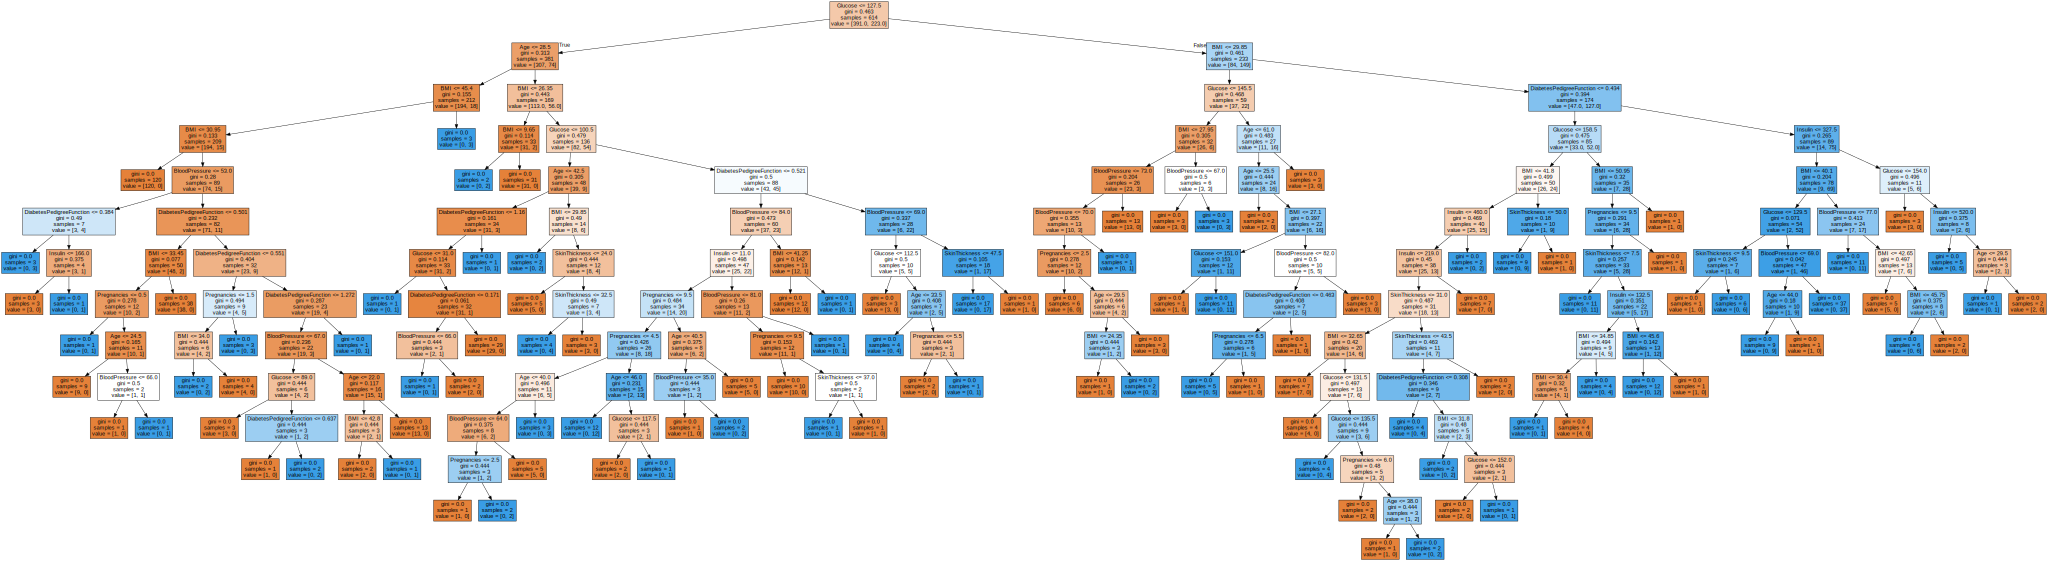

In [ ]:
graph = Source(tree.export_graphviz(model, feature_names=x.columns, filled=True))
display(SVG(graph.pipe(format='svg')))


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7597402597402597

In [ ]:
import pandas as pd
df = pd.read_csv('/content/diabetes (2).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
y = df['Outcome']
x = df.drop('Outcome',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.7662337662337663

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[96, 13],
       [23, 22]])

Text(0.5, 1.0, 'Confusion Matrix')

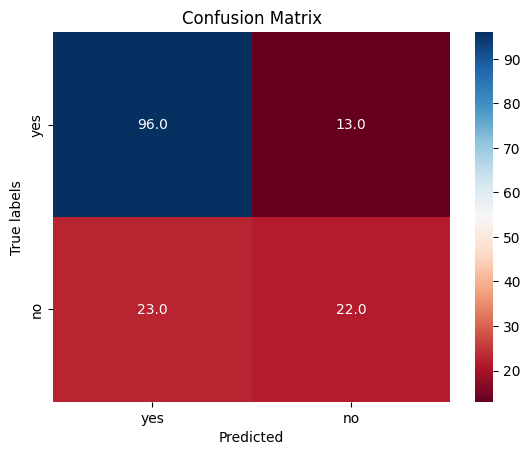

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt='.1f',cmap = 'RdBu')
Lables = ['yes','no']
ax.set_xticklabels(Lables)
ax.set_yticklabels(Lables)

ax.set_xlabel('Predicted')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[:5]

array([0, 1, 0, 1, 1])

In [ ]:
y_test[:5]

,Outcome
158,0
251,0
631,0
757,1
689,1


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.7467532467532467

In [ ]:
cn = classification_report(y_test,y_pred)
cn

'              precision    recall  f1-score   support\n\n           0       0.84      0.80      0.82       109\n           1       0.56      0.62      0.59        45\n\n    accuracy                           0.75       154\n   macro avg       0.70      0.71      0.70       154\nweighted avg       0.76      0.75      0.75       154\n'